<center><h1>Ultimate Technologies Inc. Take-Home Challenge</h1>
<h2>Cameron Hicks</h2></center>

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Part 3 ‐ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. 
See below for a detailed description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.

1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active in
their 6th month on the system. Discuss why you chose your approach, what alternatives
you considered, and any concerns you have. How valid is your model? Include any key
indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long term rider retention (again, a few sentences will suffice).

## Data description
- city: city this user signed up in
- phone: primary device for this user
- signup_date: date of account registration; in the form ‘YYYYMMDD’
- last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’
- avg_dist: the average distance in miles per trip taken in the first 30 days after signup
- avg_rating_by_driver: the rider’s average rating over all of their trips
- avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips
- surge_pct: the percent of trips taken with surge multiplier > 1
- avg_surge: The average surge multiplier over all of this user’s trips
- trips_in_first_30_days: the number of trips this user took in the first 30 days after signing up
- ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days; FALSE otherwise
- weekday_pct: the percent of the user’s trips occurring during a weekday

## Load Data

In [2]:
try:
    udf = pd.read_json('ultimate_data_challenge.json')
    print("Data loaded successfully")
except ValueError as e:
    print(f"Error loading JSON: {e}")

Data loaded successfully


In [3]:
udf.shape

(50000, 12)

In [4]:
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [5]:
udf.describe(include='all')

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
count,50000,50000.000000,50000,41878.000000,50000.000000,50000,49604,50000.000000,50000,50000.000000,50000.000000,49799.000000
unique,3,NaN,31,NaN,NaN,182,2,NaN,2,NaN,NaN,NaN
top,Winterfell,NaN,2014-01-18,NaN,NaN,2014-06-29,iPhone,NaN,False,NaN,NaN,NaN
freq,23336,NaN,2948,NaN,NaN,2036,34582,NaN,31146,NaN,NaN,NaN
mean,NaN,2.278200,NaN,4.601559,1.074764,NaN,NaN,8.849536,NaN,60.926084,5.796827,4.778158
std,NaN,3.792684,NaN,0.617338,0.222336,NaN,NaN,19.958811,NaN,37.081503,5.707357,0.446652
min,NaN,0.000000,NaN,1.000000,1.000000,NaN,NaN,0.000000,NaN,0.000000,0.000000,1.000000
25%,NaN,0.000000,NaN,4.300000,1.000000,NaN,NaN,0.000000,NaN,33.300000,2.420000,4.700000
50%,NaN,1.000000,NaN,4.900000,1.000000,NaN,NaN,0.000000,NaN,66.700000,3.880000,5.000000
75%,NaN,3.000000,NaN,5.000000,1.050000,NaN,NaN,8.600000,NaN,100.000000,6.940000,5.000000


In [6]:
udf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The data set appears to have some missing values for avg_rating_of_driver, phone, avg_rating_by_driver. 

## Data Cleaning

### Missing Values

In [7]:
missing_values = udf.isnull().sum()
print('Missing Values per Column')
print(missing_values)

Missing Values per Column
city                         0
trips_in_first_30_days       0
signup_date                  0
avg_rating_of_driver      8122
avg_surge                    0
last_trip_date               0
phone                      396
surge_pct                    0
ultimate_black_user          0
weekday_pct                  0
avg_dist                     0
avg_rating_by_driver       201
dtype: int64


<br>
<b>avg_rating_of_driver</b> has 8,122 missing values which is a significant amount. This data should not be dropped, to preserve it it will be filled with the median value of the dataset.<br>
<br>
<b>phone</b> has 396 missing values. While this is not many, we can still preserve this data by filling with 'unknown'<br>
<br>
<b>avg_rating_by_driver</b> has 201 missing values. While this is not many, we will fill it with the median value of the dataset as we did with avg_rating_of_driver.<br>

In [8]:
# Fill missing values - avg_rating_of_driver
med_driver_rating = udf['avg_rating_of_driver'].median()
udf['avg_rating_of_driver'] = udf['avg_rating_of_driver'].fillna(med_driver_rating)

In [9]:
# Fill missing values - phone
udf['phone'] = udf['phone'].fillna('unknown')

In [10]:
# Fill missing values - avg_rating_by_driver 
med_rider_rating = udf['avg_rating_by_driver'].median()
udf['avg_rating_by_driver'] = udf['avg_rating_by_driver'].fillna(med_rider_rating)

In [11]:
missing_values = udf.isnull().sum()
print('Missing Values per Column')
print(missing_values)

Missing Values per Column
city                      0
trips_in_first_30_days    0
signup_date               0
avg_rating_of_driver      0
avg_surge                 0
last_trip_date            0
phone                     0
surge_pct                 0
ultimate_black_user       0
weekday_pct               0
avg_dist                  0
avg_rating_by_driver      0
dtype: int64


### Duplicate Values

In [12]:
udf.duplicated().sum()

8

There appear to be 8 duplicat records in the data set. With such a small number these will be dropped to maintain a clean and accurate dataset.

In [13]:
udf = udf.drop_duplicates()

In [14]:
udf = udf.reset_index(drop=True)

In [15]:
udf.shape

(49992, 12)

### Convert Data Types

In [16]:
# Convert date columns to datetime objects

udf['signup_date'] = pd.to_datetime(udf['signup_date'])
udf['last_trip_date'] = pd.to_datetime(udf['last_trip_date'])

In [17]:
udf.dtypes

city                              object
trips_in_first_30_days             int64
signup_date               datetime64[ns]
avg_rating_of_driver             float64
avg_surge                        float64
last_trip_date            datetime64[ns]
phone                             object
surge_pct                        float64
ultimate_black_user                 bool
weekday_pct                      float64
avg_dist                         float64
avg_rating_by_driver             float64
dtype: object

In [18]:
udf.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


## Create Target Variable - Retained

The target variable for this project is if the user was retained, measured by if the user has taken a ride in the 30 days prior to the most recent data pull. Since the data pull date was not provided, we will base it on the max trip date recorded in the data

In [19]:
data_pull_date = udf['last_trip_date'].max()

udf['retained'] = (
    (data_pull_date - udf['last_trip_date']).dt.days <= 30
).astype(int)

In [20]:
retention_rate = udf['retained'].mean()
retention_rate


0.3761401824291887

Approximately 37.61% of users in the dataset were retained

## EDA

### Trips in the first 30 days

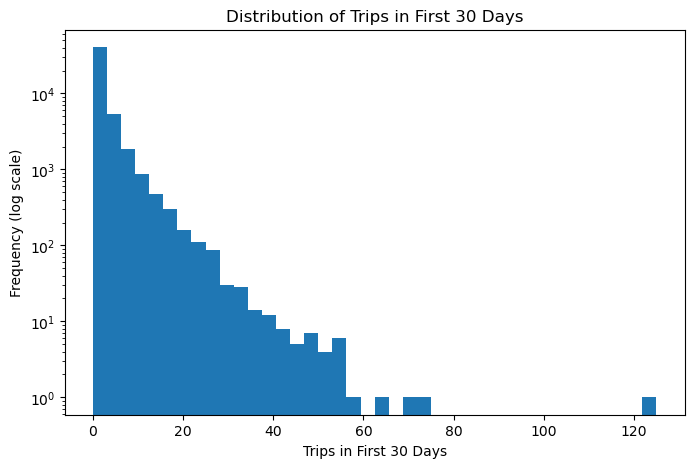

In [21]:
plt.figure(figsize=(8, 5))
plt.hist(
    udf['trips_in_first_30_days'],
    bins=40
)
plt.yscale('log')
plt.title('Distribution of Trips in First 30 Days')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Frequency (log scale)')
plt.show()


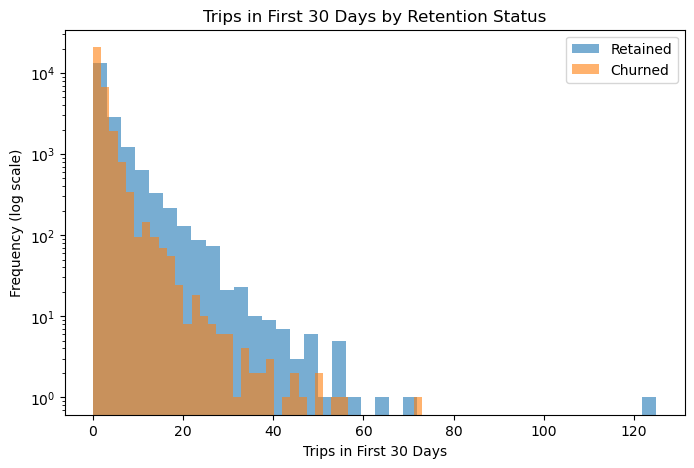

In [22]:
plt.figure(figsize=(8, 5))

plt.hist(
    udf[udf['retained'] == 1]['trips_in_first_30_days'],
    bins=40,
    alpha=0.6,
    label='Retained'
)

plt.hist(
    udf[udf['retained'] == 0]['trips_in_first_30_days'],
    bins=40,
    alpha=0.6,
    label='Churned'
)

plt.yscale('log')
plt.xlabel('Trips in First 30 Days')
plt.ylabel('Frequency (log scale)')
plt.title('Trips in First 30 Days by Retention Status')
plt.legend()
plt.show()


### Time Between First and Last Trip

In [23]:
udf['tenure_days'] = (
    udf['last_trip_date'] - udf['signup_date']
).dt.days

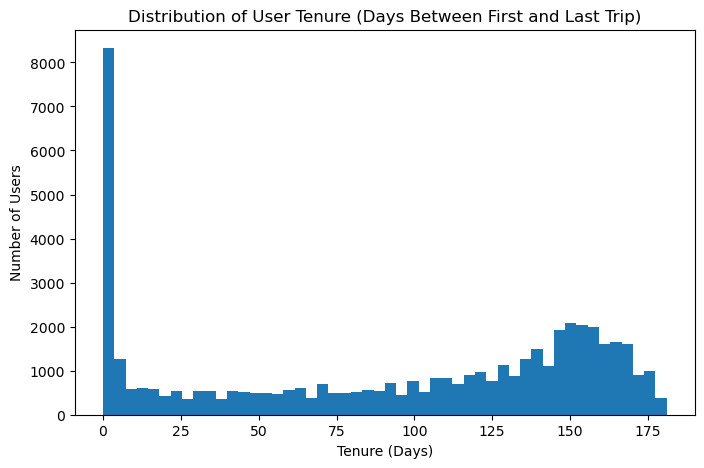

In [24]:
plt.figure(figsize=(8, 5))
plt.hist(udf['tenure_days'], bins=50)
plt.title('Distribution of User Tenure (Days Between First and Last Trip)')
plt.xlabel('Tenure (Days)')
plt.ylabel('Number of Users')
plt.show()

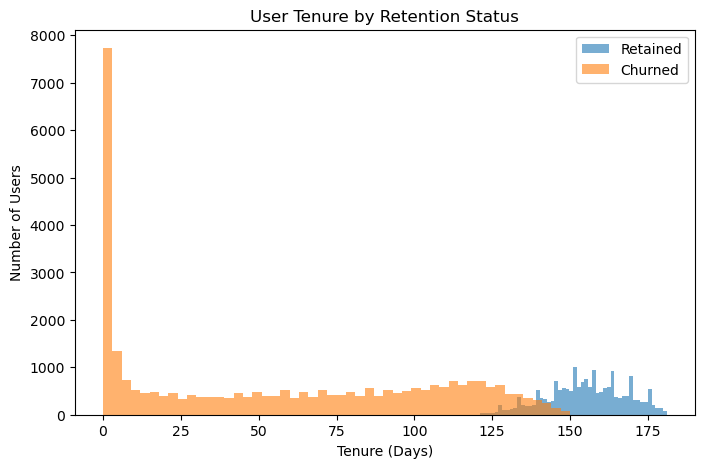

In [25]:
plt.figure(figsize=(8, 5))

plt.hist(
    udf[udf['retained'] == 1]['tenure_days'],
    bins=50,
    alpha=0.6,
    label='Retained'
)

plt.hist(
    udf[udf['retained'] == 0]['tenure_days'],
    bins=50,
    alpha=0.6,
    label='Churned'
)

plt.xlabel('Tenure (Days)')
plt.ylabel('Number of Users')
plt.title('User Tenure by Retention Status')
plt.legend()
plt.show()

### Retention

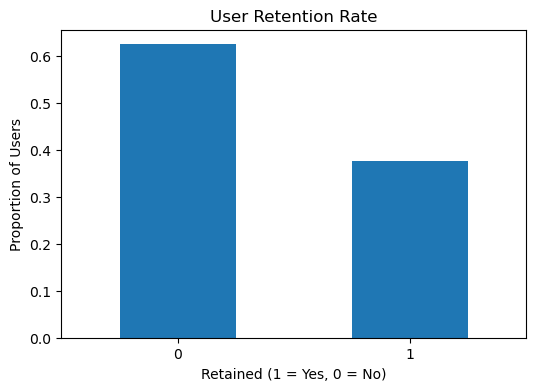

In [26]:
retention_counts = udf['retained'].value_counts(normalize=True)

plt.figure(figsize=(6, 4))
retention_counts.plot(kind='bar')
plt.title('User Retention Rate')
plt.xlabel('Retained (1 = Yes, 0 = No)')
plt.ylabel('Proportion of Users')
plt.xticks(rotation=0)
plt.show()


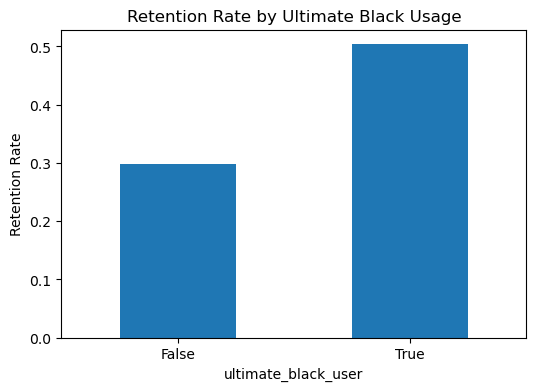

In [27]:
udf.groupby('ultimate_black_user')['retained'].mean().plot(
    kind='bar',
    figsize=(6, 4),
    title='Retention Rate by Ultimate Black Usage'
)
plt.ylabel('Retention Rate')
plt.xticks(rotation=0)
plt.show()

## Feature Prep and Preprocessing

In [59]:
udf_model = udf.copy()

In [60]:
udf_model.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,tenure_days
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1,143
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0,96
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0,1
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1,170
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0,47


In [61]:
# Encode categorical variables

udf_model = pd.get_dummies(
    udf_model,
    columns=['city', 'phone'],
    drop_first=True
)

In [62]:
udf_model.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained,tenure_days,city_King's Landing,city_Winterfell,phone_iPhone,phone_unknown
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,True,46.2,3.67,5.0,1,143,True,False,True,False
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,False,50.0,8.26,5.0,0,96,False,False,False,False
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,False,100.0,0.77,5.0,0,1,False,False,True,False
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,True,80.0,2.36,4.9,1,170,True,False,True,False
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,False,82.4,3.13,4.9,0,47,False,True,False,False


In [63]:
# Conver boolean columns
udf_model['ultimate_black_user'] = udf_model['ultimate_black_user'].astype(int)

In [64]:
# Remove dates to prevent leakage
udf_model = udf_model.drop(columns=['signup_date', 'last_trip_date'])

In [73]:
# Remove tenure days to prevent overfitting
udf_model = udf_model.drop(columns=['tenure_days'])


In [74]:
from sklearn.model_selection import train_test_split

X = udf_model.drop('retained', axis=1)
y = udf_model['retained']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.25,
    random_state=42,
    stratify=y
)

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('model', LogisticRegression(max_iter=1000))
])

log_reg.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('model', LogisticRegression(max_iter=1000))])

In [77]:
from sklearn.metrics import (
    accuracy_score,
    roc_auc_score,
    classification_report,
    confusion_matrix
)

y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

accuracy_score(y_test, y_pred)

0.7205152824451913

In [78]:
roc_auc_score(y_test, y_prob)

0.760297862995921

In [79]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.74      0.86      0.79      7797
           1       0.68      0.49      0.57      4701

    accuracy                           0.72     12498
   macro avg       0.71      0.68      0.68     12498
weighted avg       0.71      0.72      0.71     12498



In [80]:
feature_importance = pd.Series(
    log_reg.named_steps['model'].coef_[0],
    index=X.columns
).sort_values()

feature_importance.sort_values(ascending=False)

city_King's Landing       0.696688
phone_iPhone              0.490086
trips_in_first_30_days    0.461963
ultimate_black_user       0.423624
city_Winterfell           0.262771
surge_pct                 0.083263
phone_unknown             0.034599
weekday_pct               0.001488
avg_surge                -0.046084
avg_rating_by_driver     -0.068055
avg_rating_of_driver     -0.076852
avg_dist                 -0.217081
dtype: float64

<Axes: >

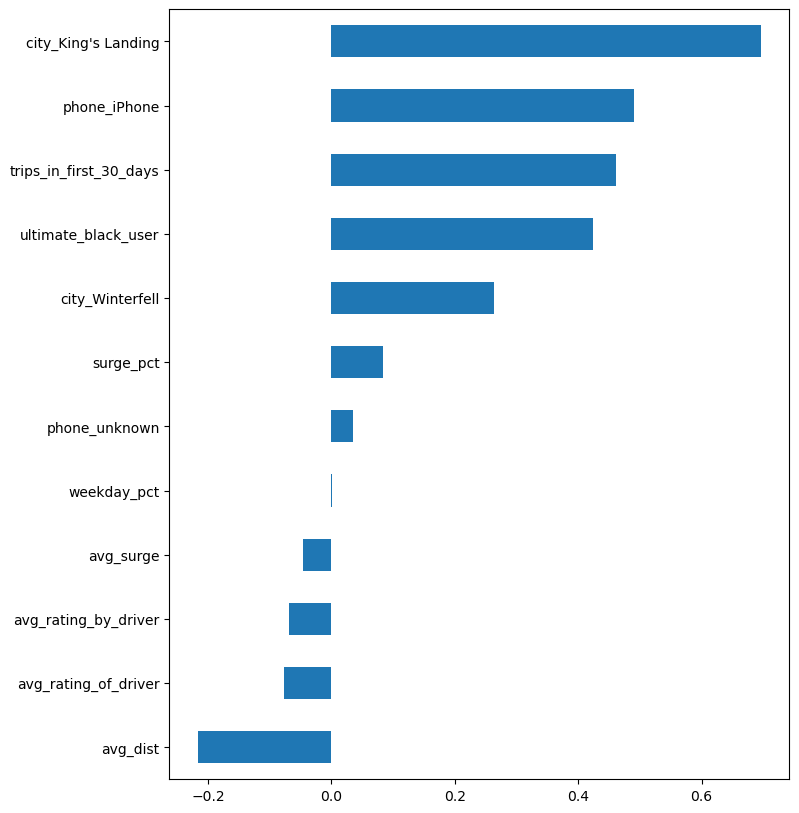

In [81]:
feature_importance.plot(kind='barh', figsize=(8, 10))

In [161]:
# Random Forest Classifier

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced'
)

rf.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)

In [163]:
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Metrics
accuracy_score(y_test, y_pred_rf)

0.7554808769403104

In [165]:
roc_auc_score(y_test, y_prob_rf)

0.8267909646331174

In [167]:
print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.80      0.81      0.81      7797
           1       0.68      0.67      0.67      4701

    accuracy                           0.76     12498
   macro avg       0.74      0.74      0.74     12498
weighted avg       0.75      0.76      0.76     12498



In [169]:
rf_importance = pd.Series(
    rf.feature_importances_,
    index=X_train.columns
).sort_values(ascending=False)

rf_importance.head(10)

avg_dist                  0.306019
weekday_pct               0.132372
avg_rating_by_driver      0.118415
trips_in_first_30_days    0.081318
avg_rating_of_driver      0.078522
surge_pct                 0.073491
city_King's Landing       0.064459
avg_surge                 0.062706
phone_iPhone              0.035413
ultimate_black_user       0.029172
dtype: float64

<Axes: title={'center': 'Top Feature Importances (Random Forest)'}>

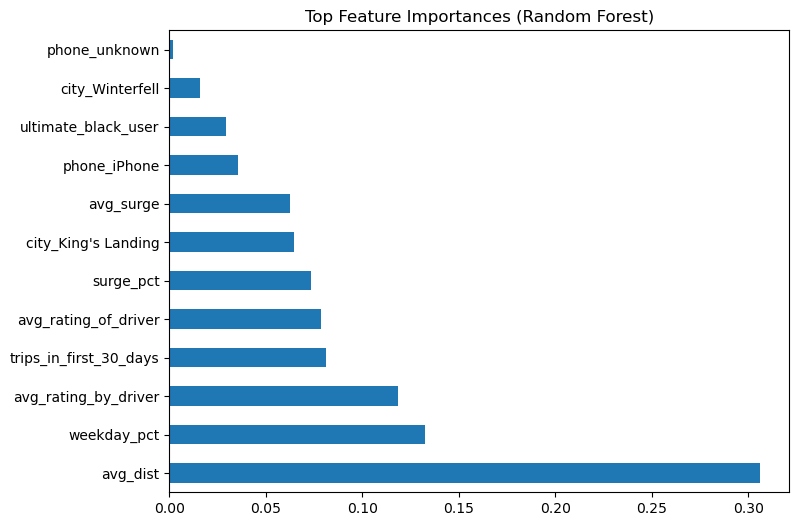

In [170]:
rf_importance.head(15).plot(
    kind='barh',
    figsize=(8, 6),
    title='Top Feature Importances (Random Forest)'
)